In [2]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

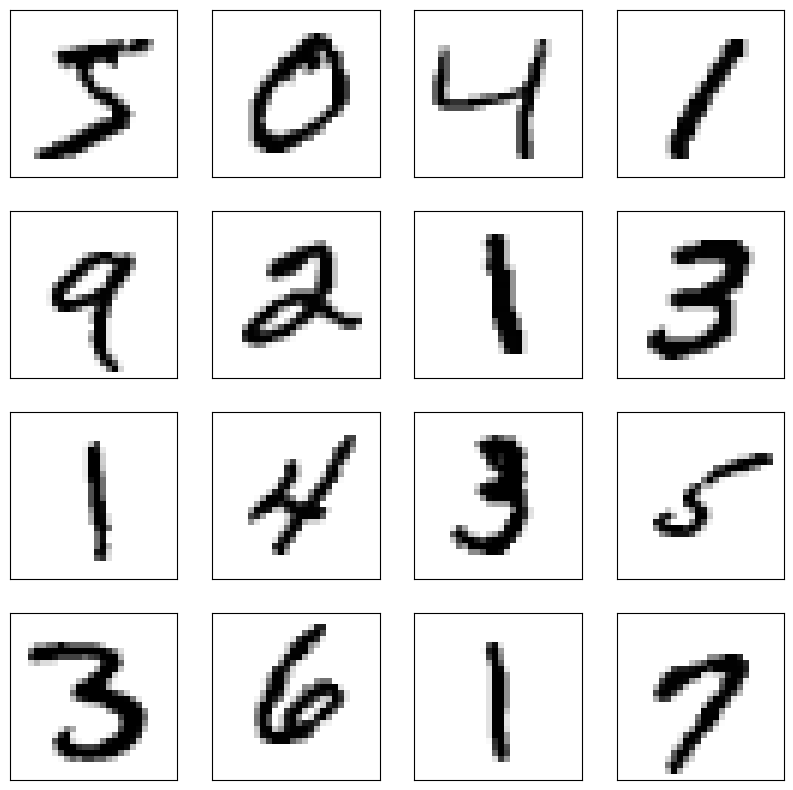

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n = 4
plt.figure(figsize=(10, 10))
for i in range(n**2):
    plt.subplot(n, n, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# Создание модели
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# Второй сверточный слой
model.add(Conv2D(32, kernel_size=3, activation='relu'))
# Вектор для полносвязной сети
model.add(Flatten())
# Создаем однослойный пресептрон
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/erick/Desktop/Projects/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
print(hist.history)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9796 - loss: 0.0633 - val_accuracy: 0.9741 - val_loss: 0.0911
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9881 - loss: 0.0375 - val_accuracy: 0.9752 - val_loss: 0.0865
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.9785 - val_loss: 0.0927
{'accuracy': [0.978950023651123, 0.9860166907310486, 0.9886999726295471], 'loss': [0.06734996289014816, 0.04425149783492088, 0.03676910325884819], 'val_accuracy': [0.9740999937057495, 0.9751999974250793, 0.9785000085830688], 'val_loss': [0.09111585468053818, 0.08654175698757172, 0.09273353964090347]}


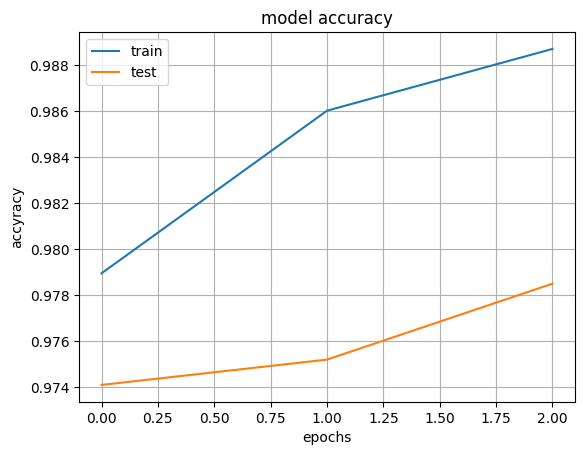

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accyracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

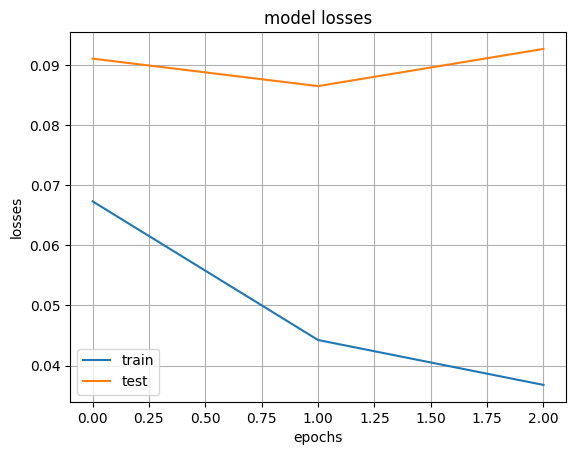

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model losses')
plt.ylabel('losses')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

In [27]:
del model
model = Sequential()
from keras.layers import MaxPooling2D
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [28]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
print(hist.history)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.2028 - loss: 0.1582 - val_accuracy: 0.5606 - val_loss: 0.0852
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.7372 - loss: 0.0495 - val_accuracy: 0.9492 - val_loss: 0.0086
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9569 - loss: 0.0072 - val_accuracy: 0.9681 - val_loss: 0.0052
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9738 - loss: 0.0042 - val_accuracy: 0.9764 - val_loss: 0.0039
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9803 - loss: 0.0032 - val_accuracy: 0.9781 - val_loss: 0.0034
{'accuracy': [0.32376667857170105, 0.8110166788101196, 0.9617833495140076, 0.9741666913032532, 0.9800166487693787], 'loss': [0.13324709236621857, 0.0349106527864933, 0.00638402346521616, 0.004209599923342466, 0.0032410984858870506], 'val_accuracy': [0.5605999827384949, 0.9491999745368958, 0.9681000113487244, 0.9764000177383423, 0.9781000018119

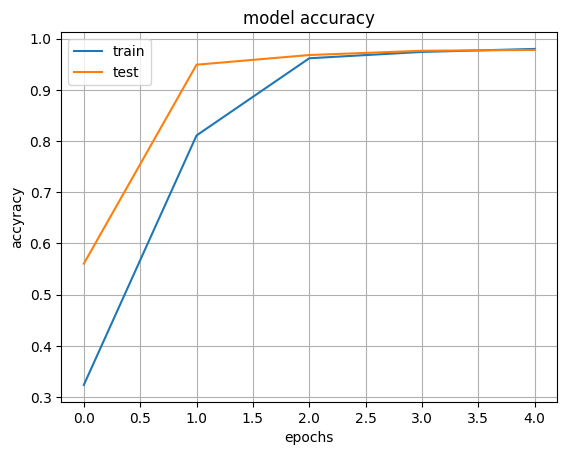

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accyracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

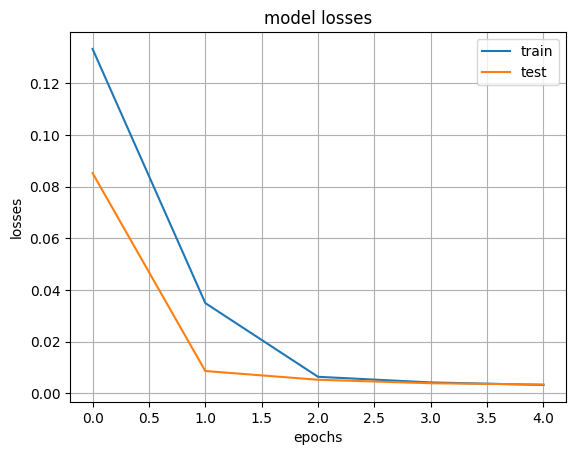

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model losses')
plt.ylabel('losses')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

In [36]:
from keras.models import load_model
model.save('SequentModel.keras')
# del model
# model = load_model('SequentModel.keras')

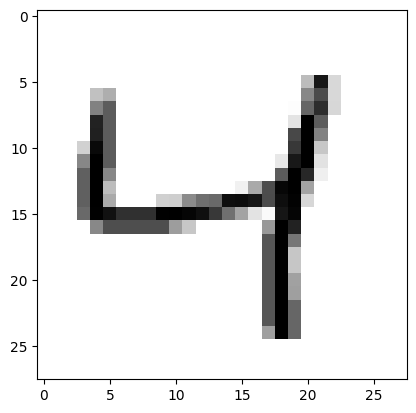

In [43]:
plt.imshow(X_train[2], cmap=plt.cm.binary)

In [53]:
y_train_pr = model.predict(X_train[:3])
import numpy as np
print(np.round(y_train_pr,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.   0.   0.   0.01 0.   0.99 0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]]
